In [31]:
from scipy import signal as sig 
from scipy.ndimage import gaussian_filter

import numpy as np 
from matplotlib import pyplot as plt
%matplotlib inline 
from skimage.io import imread
from skimage.color import rgb2gray
import cv2

### Spatial Image derivative

In [13]:
def gradient_img_x(img, kernel_i):
    img_di = sig.convolve2d(img, kernel_i, mode="same")
    return img_di

def gradient_gaussian(img, sigma):
    img_k = gaussian_filter(img, sigma=sigma)
    return img_k
    
def gradient_sobel_x(img):
    kernel_x = np.array([[-1, 0, 1],[-2, 0, 2],[-1, 0, 1]])
    return sig.convolve2d(img, kernel_x, mode='same')

def gradient_sobel_y(img):
    kernel_y = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])
    return sig.convolve2d(img, kernel_y, mode='same')
    


### Step 0: load the image  

In [28]:
img_c = cv2.imread("images/left12.jpg")
img = cv2.imread("images/left12.jpg", 0)

### Step 1: Compute horizontal and vertical derivatives of image $I_x$ and $I_y$

$I_x = \frac{d}{dx}G(x, y, \sigma_d)*I(x_i, y_i)$<br>
$I_y = \frac{d}{dy}G(x, y, \sigma_d)*I(x_i, y_i)$

In [14]:
Ix = gradient_sobel_x(img)
Iy = gradient_sobel_y(img)

### Step 2: Compute three images corresponding to three terms in Hessian Matrix 

In [15]:
Ixx = Ix**2
Ixy = Iy*Ix
Iyy = Iy**2

### Step 3: Convolve these three images with a larger Gaussian window
$\frac{d}{dx}G(x, y, \sigma_I)*I_{xx}$<br>
$\frac{d}{dy}G(x, y, \sigma_I)*I_{yy}$<br>
$\frac{d}{dy}G(x, y, \sigma_I)*I_{xy}$<br>

In [16]:
Ixx = gaussian_filter(Ixx, 1)
Iyy = gaussian_filter(Iyy, 1)
Ixy = gaussian_filter(Ixy, 1)

### Step 4: Compute scalar cornerness value using one of the R measures
$R = det(H) - \lambda trace(H)**2$

In [18]:
lambda_ = 0.05
# determinant of H
det_h = Ixx * Iyy - Ixy **2
# trace of H
traceH = Ixx + Iyy

# Harris Response
r  = det_h - lambda_ * traceH**2

In [24]:
r.shape

(480, 640)

### Step 5: Find  corners using Harris response

In [46]:
img_corner = np.copy(img_c)
corner_threshold_r = 109564981.55

for row_i , response_i in enumerate(r):
    for col_i, r_val in enumerate(response_i):
        if r_val > corner_threshold_r: 
            img_corner[row_i, col_i] = [255, 0, 0]

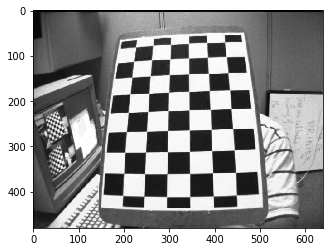

In [47]:
plt.imshow(img, cmap="gray")

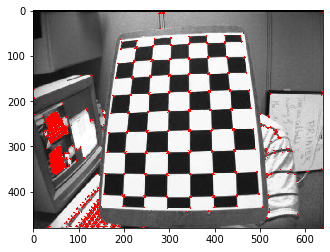

In [48]:
plt.imshow(img_corner, cmap="gray")

In [42]:
np.max(r)

10956498155.55

### How to find appropiate threshold value ??

In [50]:
from skimage.feature import corner_peaks

corners_corr = corner_peaks(r)

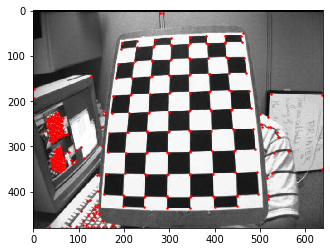

In [53]:
fig, ax = plt.subplots()
ax.imshow(img_c)
ax.plot(corners_corr[:, 1], corners_corr[:, 0], '.r', markersize=3)
